# Grammars and parsing

You can use grammars to generate sentences, to validate and analyse sentence structure.


 
 ## A1 - Constituents and Dependency
 
What are the definitions of the following terms?
 - Word
 - Phrase
 - Constituents
 - Sentence
 - Dependency

Explain how to detect the constituents of a sentence? 


Now consider the following example.

 "The guests gladly eat the sweet cake and the tasty bread"
 
 Find the Constituents for the sentence and draw a dependency tree for this sentence.

###### Solution

__Word__: Element of lexicon of language <br>
__Phrase__: Valid combination of word forms  <br>
__Constituents__: A word or group of words (Phrases) that function as a single unit inside a sentence.  <br>
__Sentence__: Valid combination of Constituents. Sentences can be validated to be true or false, constituents can't.<br>
__Dependency__: Dependency models the dependencies between the words in a sentence. Usually there are binary relations, that model grammatical relations between the nodes. <br>
E.g. 
- Adjective -- Noun (adjective modifier) sweet cake
- Adverb -- Verb (adverbial modifier) gladly eat 
- Noun -- Verb (Subject) guests eat 
- Determiner -- Noun (Determiner) the guests

How to detect the constituents of a sentence?
 - Replacement/Removal/Question & Answer Test


[The guests] NOMINALPHRASE <br>
[the sweet cake] NOMINALPHRASE <br>
[the tasty bread] NOMINALPHRASE <br>
[the sweet cake and the tasty bread] NOMINALPHRASE <br>
[gladly eat the sweet cake and the tasty breads]VERBALPHRASE <br>
[gladly]ADVERBIALPHRASE <br>


It is also possibly to not add [gladly] to the VERBPHRASE.
That would mean gladly modifies the sentence as a whole directly and not the VERBPHRASE.




```
                    
                 __  eat  __
                /     |     \  
               /      |      \           
          guests    gladly     cake  _ _______
              |               /  |    \       \ 
            The              /   |     \       \
                           the sweet  and     bread
                                             /     \
                                           the     tasty
                                             
```
Have a look here [DisplaCy](https://explosion.ai/demos/displacy?text=The%20guests%20gladly%20eat%20the%20sweet%20cake%20and%20the%20tasty%20bread&model=en_core_web_sm&cpu=1&cph=0)


 
 ## A2 - Ambiguity
 $$\textit{We can hear the band in the park}$$
 
 Formulate the constituency tree(s). There is an ambiguity in this sentence, how is this reflected in the tree(s)?
 
 Now consider: 

$$\textit{In the park, we can hear the band}$$
 
 Does the same ambiguity still exist? What changed in the constituency tree?
 

#### Solution

The ambiguity lies in "in the park". Either the band is in the park
(i)
 -  [the band in the park]NP

or we, the listeners, are in the park and can hear a band

 -  [[we]NP [[hear]V [the band]NP [in the park]PREPPHRASE]VP]Sentence


(ii) No, the constituent combining the band with the prepositional phrase is not possible anymore

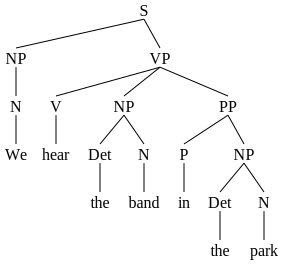

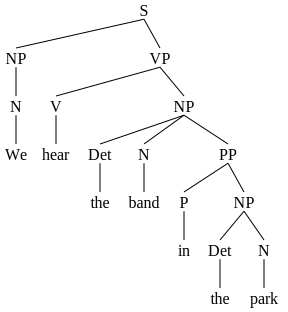

In [1]:
#!pip install svgling
import nltk
s = "We hear the band in the park".split()
grammar = nltk.CFG.fromstring('''
S -> NP VP
NP -> N | Det N | Det N PP
VP -> V NP | V NP PP
PP -> P NP
Det -> 'the'
N -> 'band' | 'park' | 'We'
V -> 'hear' 
P -> 'in'
''')
parser = nltk.ChartParser(grammar)
for tree in parser.parse(s):
    display(tree)

## A3 - Palindromes

Palindromes are words or sentences that read the same, forward _and_ backward. For example `Mr. Owl ate my metal worm` or more specifically without spaces and punctuation `mrowlatemymetalworm`. More general it can be any string of characters that reads the same forward and backward.

For any word $w = \{w_1,w_2,...w_n\}$:
$$ w_i  = w_{n-i}\, \forall\, 1 \leq i \leq n $$



What type of grammar would you need to generate these palindromes ?
Give an example grammar which generates the set of all palindromes over the alphabet of terminal symbols $T=\{0, 1\}$.
How would this generalize to all palindromes over the latin alphabet ? 

#### Solution


Terminals  $T =\{0, 1\}$, non-terminals  $N = \{S\}$

$$
\begin{align}
S &\rightarrow 0S0\, |\, 1S1\, | \, 0\, |\, 1\, | \, \epsilon  \newline
\end{align}
$$

For all elements of the latin alphabet $A_{latin}$, we would add set the Terminals $T=A_{latin}$ and then add every rule :
$$S \rightarrow \{\epsilon\} + \cup_{t \in T}\{tSt\}+ \cup_{t \in T}\{t\}$$

This grammar is context-free.


# Programming

NLTK provides a way to define grammars in a string-based fashion. It then provides a parse that validates input sentence on the basis of your grammar. 

You can see the documentation in [Chapter 8](https://www.nltk.org/book/ch08.html) of the NLTK book.

In [2]:
import nltk

# P1 - CFG Parser

Write a context-free grammar to generate the sentence 

```
Peter sieht den Mann mit dem Ferhrohr .
```
  
Make sure the gramar validates both ways of reading the sentence.


In [3]:
grammar = nltk.CFG.fromstring('''
S -> NP VP Punct
NP -> N | Det N | Det N PP
VP -> V NP | V NP PP
PP -> P NP
Det -> 'den' | 'dem' | 'der'
N -> 'Peter' | 'Mann' | 'Fernrohr'
V -> 'sieht' 
P -> 'mit'
Punct -> '.'
''')



In [4]:
parser = nltk.ChartParser(grammar)

In [5]:
sent = ['Peter', 'sieht', 'den', 'Mann', 'mit', 'dem', 'Fernrohr', '.']
#sent = ["The", "boy", "saw", "the", "man", "with", "the", "telescope", "."]

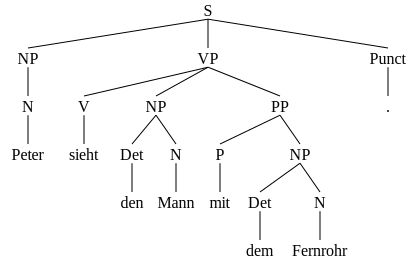

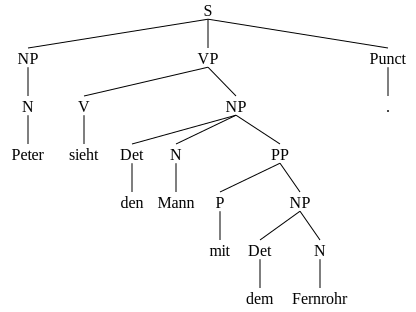

In [6]:
for tree in parser.parse(sent):
    display(tree)

# P2 Errors in the Grammar

Find erroneous sentences that are also validated by the grammar you wrote. 

Specifically, find examples of
- Error of Agreement (Kongruenzfehler),
- Wrong semantic role (inkorrekte semantische Rolle).


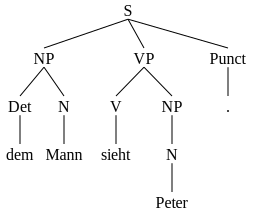

In [7]:
sent = ['dem', 'Mann', 'sieht', 'Peter', '.']
for tree in parser.parse(sent):
    display(tree)

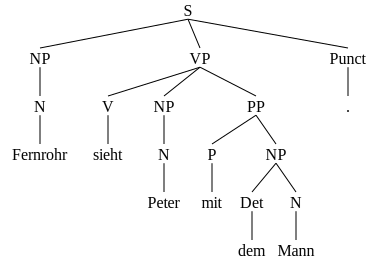

In [8]:
sent = ['Fernrohr', 'sieht', 'Peter', 'mit', 'dem', 'Mann', '.']
for tree in parser.parse(sent):
    display(tree)

# P3 Recursive structure

The grammar you wrote contains a recursive structure. Which one? Show an example.

In [9]:
sent = 'den Mann mit dem Fernrohr mit dem Mann mit dem Fernrohr mit dem Mann sieht Peter .'.split()

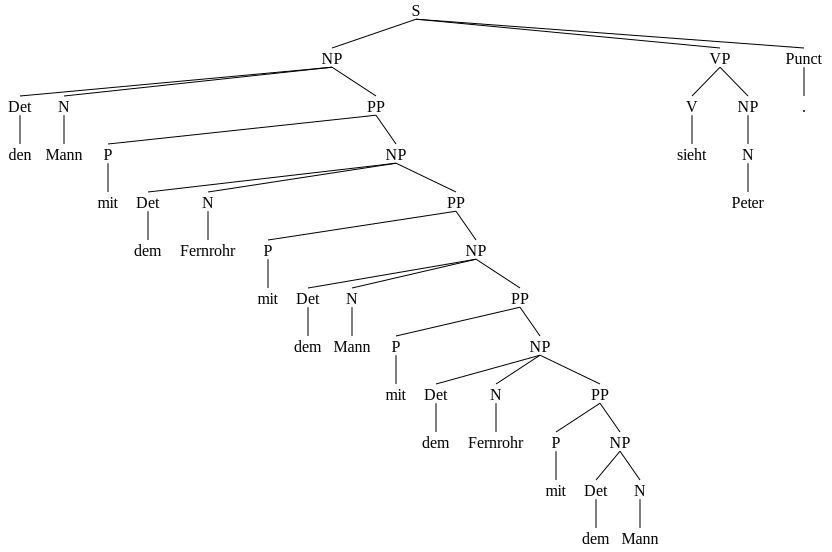

In [10]:
for tree in parser.parse(sent):
    display(tree)

# P4

You can use a parse tree to analyse sentences for various syntactic roles. You can identify subject-object structure to generate questions and answers, for example.

Write a function that uses the parse tree to generate question-answer pairs from an example sentence for the direct object of the sentence. If the sentence allows for multiple ways of reading (as in example 1), return all possible pairs.


*Hint:* Read the documentation of `help(nltk.tree.Tree)`to find out how to extract subtrees and leaves from the parse trees.

*Hint 2:* For the additional examples to work add the according rules to your grammar. 

In [67]:
def qa(sent):
    pairs = []
    for tree in parser.parse(sent):
        display(tree)
        question = ['Was'] + tree[1][0].leaves() + tree[0].leaves()
        
        if len(tree[1]) > 2:
            for t in tree[1][2:]:
                question += t.leaves()
        question += ['?']   
        answer = tree[1][1].leaves() + ['.']
        pairs.append((question, answer))
    return pairs

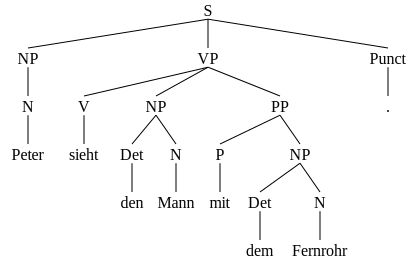

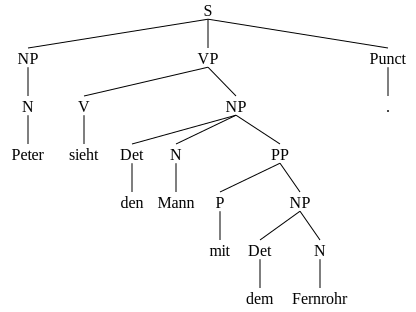

[(['Was', 'sieht', 'Peter', 'mit', 'dem', 'Fernrohr', '?'],
  ['den', 'Mann', '.']),
 (['Was', 'sieht', 'Peter', '?'],
  ['den', 'Mann', 'mit', 'dem', 'Fernrohr', '.'])]

In [12]:
q = qa(['Peter', 'sieht', 'den', 'Mann', 'mit', 'dem', 'Fernrohr', '.'])
q

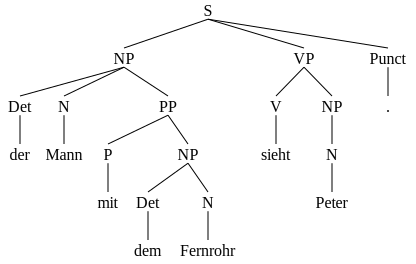

[(['Was', 'sieht', 'der', 'Mann', 'mit', 'dem', 'Fernrohr', '?'],
  ['Peter', '.'])]

In [13]:
q = qa(['der', 'Mann', 'mit', 'dem', 'Fernrohr', 'sieht', 'Peter', '.'])
q

# P5

Extend the grammar to include:

- Johanna schreibt einen Brief.
- Der neue Informatik-Campus liegt am Augustusplatz.
- Der Bayer stellt eine Maß auf den Tisch.
- Das Buch von Peter liegt auf dem Tisch.

Check if the question generator of previous section still works!

In [93]:
grammar = nltk.CFG.fromstring('''
S -> NP VP Punct
NP -> N | Det N |  Det Adj N | Det N PP
VP -> V NP | V PP | V NP PP
PP -> P NP
Adj -> 'neue'
Det -> 'der' | 'den' | 'dem' | 'das' | 'eine' | 'Der' | 'einen' | 'Das'
N -> 'Peter' | 'Mann' | 'Fernrohr' | 'Buch' | 'Tisch' | 'Bayer' | 'Maß' |  'InformatikCampus' | 'Brief' | 'Johanna' | 'Augustusplatz'
V -> 'sieht' | 'liegt' | 'stellt' | 'schreibt'
P -> 'mit' | 'auf' | 'von'| 'am'
Punct -> '.'
''')

In [94]:
parser = nltk.ChartParser(grammar)

In [95]:
sents = [
    "Johanna schreibt einen Brief .".split(' '),
    "Der neue InformatikCampus liegt am Augustusplatz .".split(' '),
    "Der Bayer stellt eine Maß auf den Tisch .".split(' '),
    "Das Buch von Peter liegt auf dem Tisch .".split(' '),
]

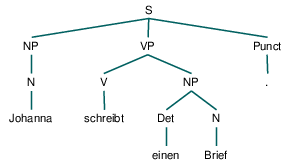

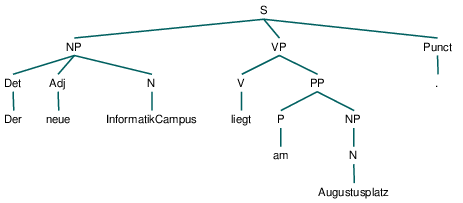

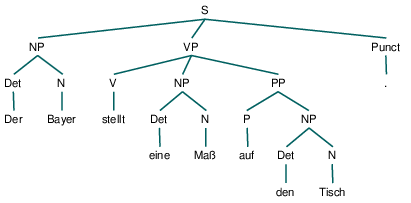

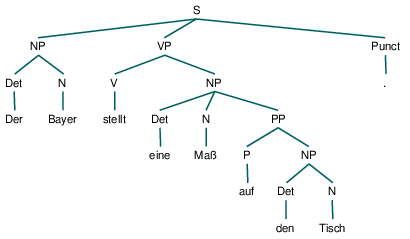

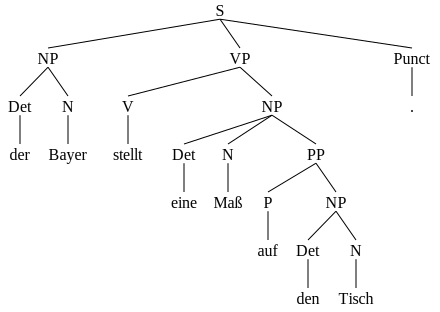

[[(['Was', 'schreibt', 'Johanna', '?'], ['einen', 'Brief', '.'])],
 [(['Was', 'liegt', 'Der', 'neue', 'InformatikCampus', '?'],
   ['am', 'Augustusplatz', '.'])],
 [(['Was', 'stellt', 'Der', 'Bayer', 'auf', 'den', 'Tisch', '?'],
   ['eine', 'Maß', '.']),
  (['Was', 'stellt', 'Der', 'Bayer', '?'],
   ['eine', 'Maß', 'auf', 'den', 'Tisch', '.'])],
 [(['Was', 'liegt', 'Das', 'Buch', 'von', 'Peter', '?'],
   ['auf', 'dem', 'Tisch', '.'])]]

In [96]:
q = [qa(sent) for sent in sents]
q

# Literatur

NLTK-Buch: Kap. 8

# Side Note:


NLTK has a implementation of the [ELIZA](https://www.nltk.org/_modules/nltk/chat/eliza.html) chat module.
(There are also other chat implementations in nltk [module-nltk.chat](https://www.nltk.org/api/nltk.chat.html#module-nltk.chat) )

This implementation uses regular expressions to match parts of the input sentence and utter them back to the user or ask a question.

Inprinciple the above question-answer pair generation can implement a very similar dialogue system.


In [18]:
nltk.chat.eliza_chat()


Therapist
---------
Talk to the program by typing in plain English, using normal upper-
and lower-case letters and punctuation.  Enter "quit" when done.
Hello.  How are you feeling today?
>im quite okay
Why do you say that im quite okay?
>last week i was ill.
Let's change focus a bit... Tell me about your family.
>there is my mom and my dad.
Please tell me more.
>thats all.
How does that make you feel?
>i dont feel so good.
I see.
>and you?
Why do you ask that?
>i am interested.
How do you feel about being interested?


In [ ]:
nltk.chat.zen_chat()

***************************************************************************
                                Zen Chatbot!                               
***************************************************************************
         "Look beyond mere words and letters - look into your mind"        
* Talk your way to truth with Zen Chatbot.
* Type 'quit' when you have had enough.
***************************************************************************
Welcome, my child.
>hello master
Ask the question you have come to ask.
>why am i here?
Perhaps you only think youamhere
>why does it rain today?
I cannot tell you whydoes it rain today.
